In [100]:
from math import floor

import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from scipy.fftpack import fft, ifft

# Hann window


---
VIDEO: Fourier transform for spectral analyses
---


In [101]:
## Generate a multispectral noisy signal

# simulation parameters
srate = 1234  # in Hz
npnts = srate * 2  # 2 seconds: "time points"
time = np.arange(0, npnts) / srate  # "time vector" = [0, 1/srate, ... 2 - 1/srate] ("normalized time points")

print(f"Sampling rate: {srate} Hz, Number of points: {npnts}, Time: [0, {time[1]}, ..., {time[-1]} = 2-1/srate]")

Sampling rate: 1234 Hz, Number of points: 2468, Time: [0, 0.0008103727714748784, ..., 1.9991896272285252 = 2-1/srate]


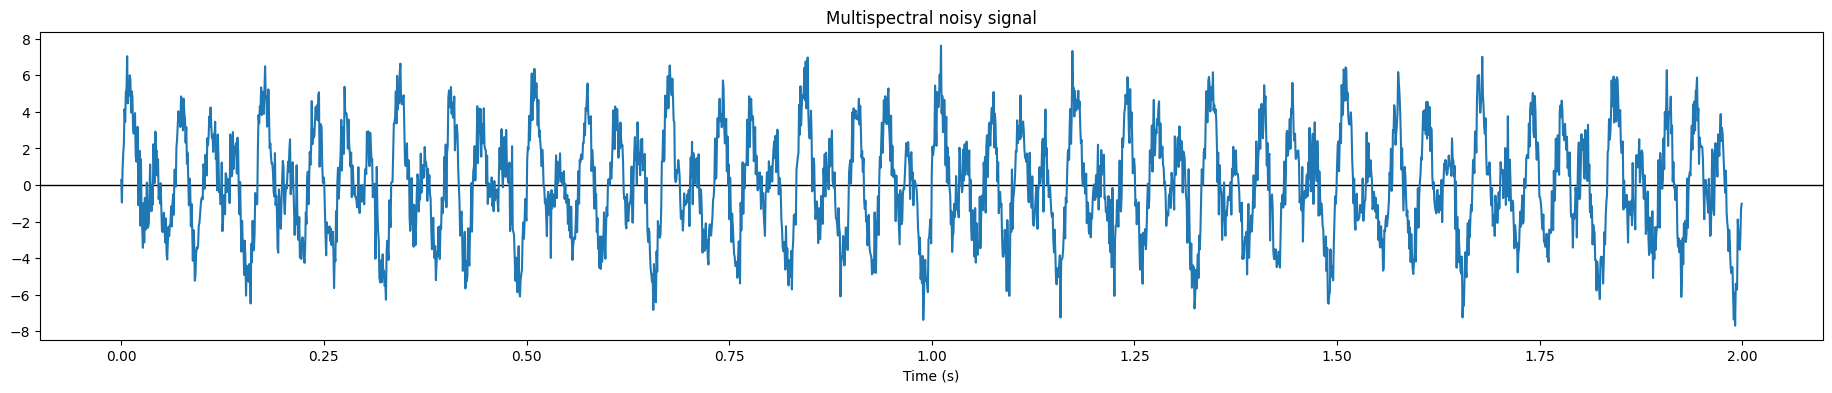

In [102]:
# frequencies to include
frex = [12, 18, 30]

signal = np.zeros(len(time))

# loop over frequencies to create signal
for fi in range(0, len(frex)):
    signal = signal + (fi + 1) * np.sin(2 * np.pi * frex[fi] * time)

# add some noise
signal = signal + np.random.randn(len(signal))

plt.figure(figsize=(23, 4))
plt.axhline(0, color='black', lw=1)
plt.title('Multispectral noisy signal')
plt.xlabel('Time (s)')  # time vector is the normalized time points 
plt.plot(time, signal)
plt.show()  # plot the signal versus the time vector

In [103]:
# amplitude spectrum via Fourier transform
signalX = fft(signal)
signalAmp = 2 * np.abs(signalX) / npnts
print(f"Length of the signal: {len(signal)}")
print(f"Length of the signalX: {len(signalX)}")
print(f"Length of the signalAmp: {len(signalAmp)}")
print(f'signalAmp: {signalAmp}')

# vector of frequencies in Hz
hz = np.linspace(0, srate / 2, int(np.floor(npnts / 2) + 1))

Length of the signal: 2468
Length of the signalX: 2468
Length of the signalAmp: 2468
signalAmp: [0.06538792 0.01210949 0.01387185 ... 0.05977336 0.01387185 0.01210949]


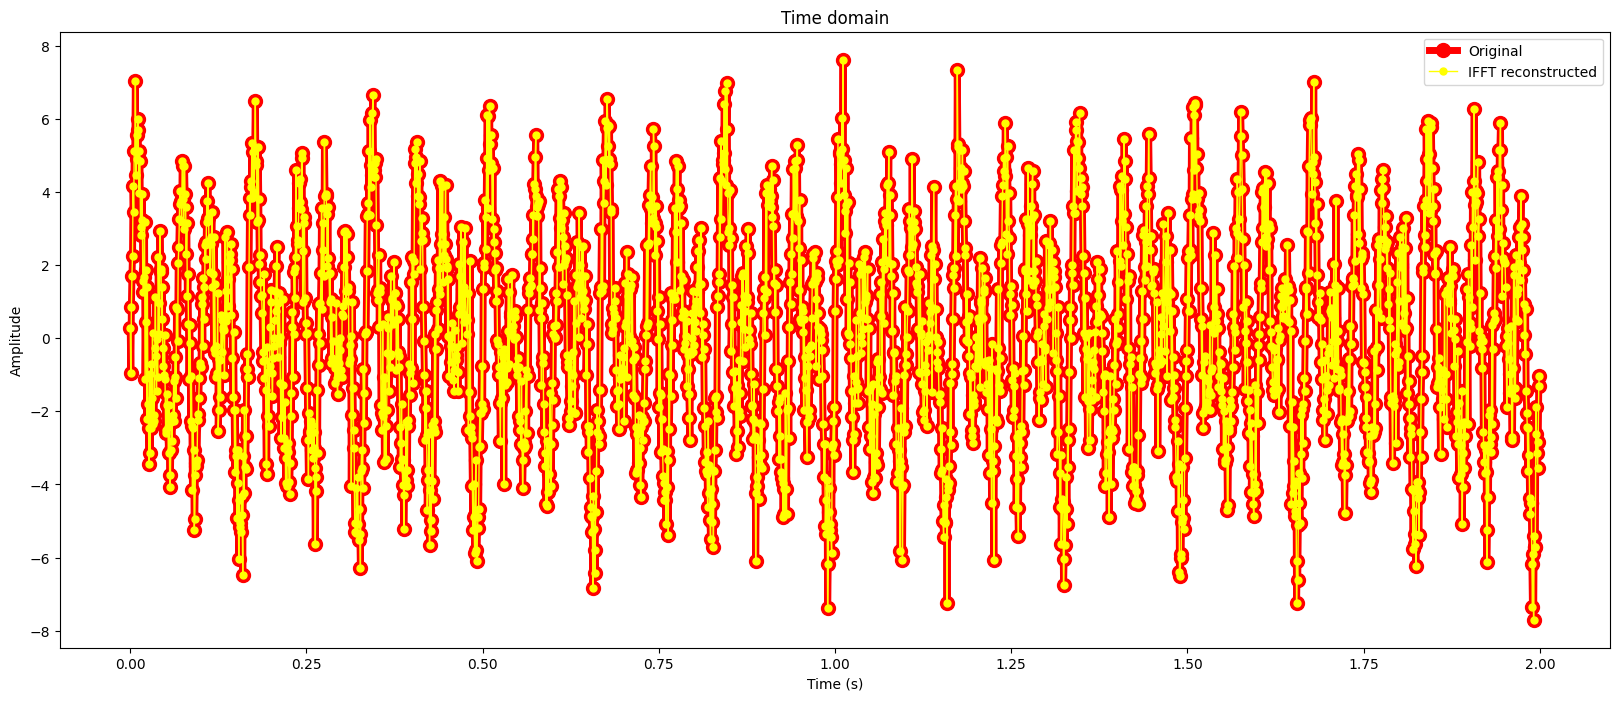

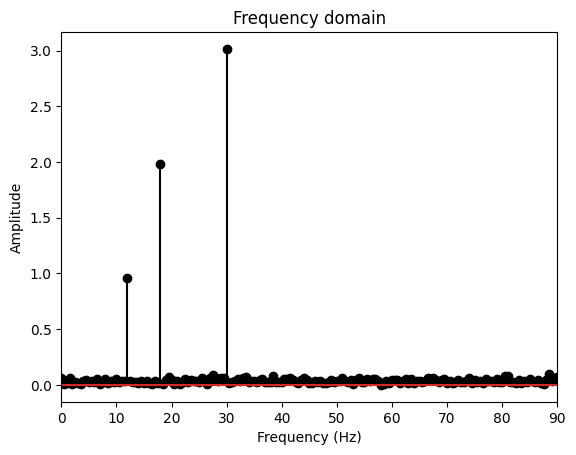

In [104]:
## plots

plt.figure(figsize=(20, 8))
plt.plot(time, signal, "ro-", label="Original", linewidth=5, markersize=10)
plt.plot(
    time,
    np.real(ifft(signalX)),
    "o-",
    label="IFFT reconstructed",
    linewidth=1,
    markersize=5,
    alpha=1,
    color="yellow",
)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time domain")
plt.legend()
plt.show()

plt.stem(hz, signalAmp[0: len(hz)], "k")
plt.xlim([0, np.max(frex) * 3])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Frequency domain")
plt.show()

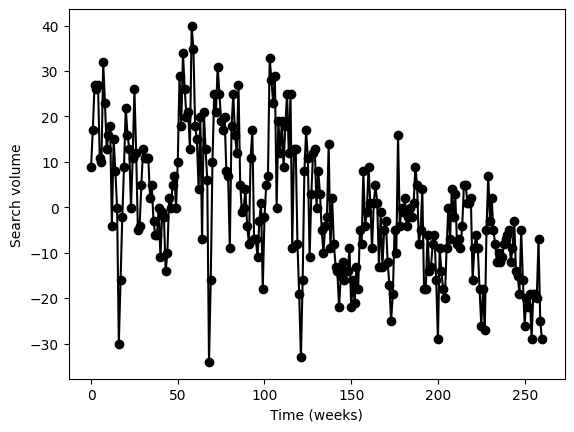

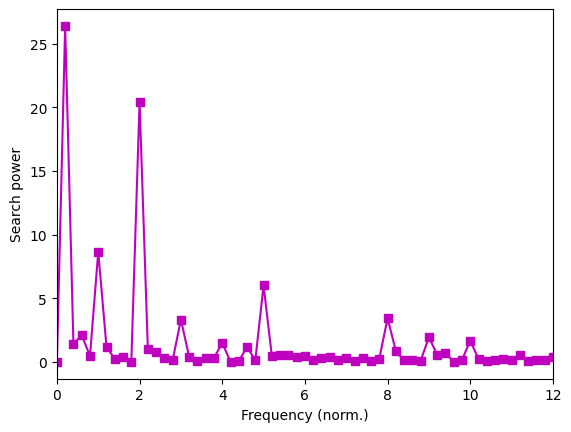

In [105]:
## example with real data

# data downloaded from https://trends.google.com/trends/explore?date=today%205-y&geo=US&q=signal%20processing
searchdata = [69, 77, 87, 86, 87, 71, 70, 92, 83, 73, 76, 78, 56, 75, 68, 60, 30, 44, 58, 69, 82, 76, 73, 60, 71, 86,
              72, 55, 56, 65, 73, 71, 71, 71, 62, 65, 57, 54, 54, 60, 49, 59, 58, 46, 50, 62, 60, 65, 67, 60, 70, 89,
              78, 94, 86, 80, 81, 73, 100, 95, 78, 75, 64, 80, 53, 81, 73, 66, 26, 44, 70, 85, 81, 91, 85, 79, 77, 80,
              68, 67, 51, 78, 85, 76, 72, 87, 65, 59, 60, 64, 56, 52, 71, 77, 53, 53, 49, 57, 61, 42, 58, 65, 67, 93,
              88, 83, 89, 60, 79, 72, 79, 69, 78, 85, 72, 85, 51, 73, 73, 52, 41, 27, 44, 68, 77, 71, 49, 63, 72, 73,
              60, 68, 63, 55, 50, 56, 58, 74, 51, 62, 52, 47, 46, 38, 45, 48, 44, 46, 46, 51, 38, 44, 39, 47, 42, 55,
              52, 68, 56, 59, 69, 61, 51, 61, 65, 61, 47, 59, 47, 55, 57, 48, 43, 35, 41, 55, 50, 76, 56, 60, 59, 62,
              56, 58, 60, 58, 61, 69, 65, 52, 55, 64, 42, 42, 54, 46, 47, 52, 54, 44, 31, 51, 46, 42, 40, 51, 60, 53,
              64, 58, 63, 52, 53, 51, 56, 65, 65, 61, 61, 62, 44, 51, 54, 51, 42, 34, 42, 33, 55, 67, 57, 62, 55, 52,
              48, 50, 48, 49, 52, 53, 54, 55, 48, 51, 57, 46, 45, 41, 55, 44, 34, 40, 38, 41, 31, 41, 41, 40, 53, 35,
              31]
N = len(searchdata)

# possible normalizations...
searchdata = searchdata - np.mean(searchdata)

# power
searchpow = np.abs(fft(searchdata) / N) ** 2
hz = np.linspace(0, 52, N)

plt.plot(searchdata, 'ko-')
plt.xlabel('Time (weeks)')
plt.ylabel('Search volume')
plt.show()

plt.plot(hz, searchpow, 'ms-')
plt.xlabel('Frequency (norm.)')
plt.ylabel('Search power')
plt.xlim([0, 12])
plt.show()


---
# VIDEO: Welch's method
---


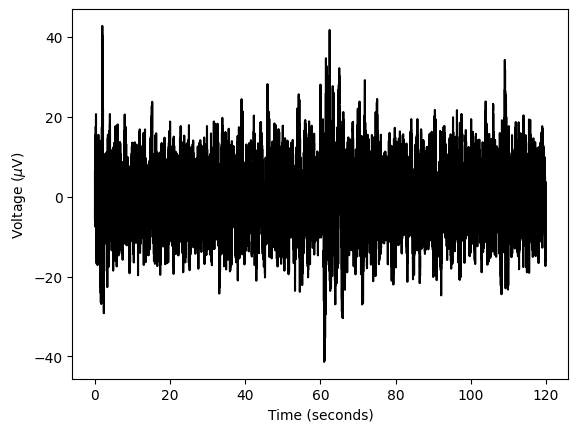

In [106]:
# load data and extract
matdat = sio.loadmat('EEGrestingState.mat')
eegdata = matdat['eegdata'][0]
srate = matdat['srate'][0]

# time vector
N = len(eegdata)
timevec = np.arange(0, N) / srate

# plot the data
plt.plot(timevec, eegdata, 'k')
plt.xlabel('Time (seconds)')
# write microvolt symbol (LateX) in the ylabel
plt.ylabel('Voltage ($\\mu$V)')
plt.show()

In [107]:
## one big FFT (not Welch's method)

# "static" FFT over entire period, for comparison with Welch
eegpow = np.abs(fft(eegdata) / N) ** 2
hz = np.linspace(0, srate / 2, int(np.floor(N / 2) + 1))


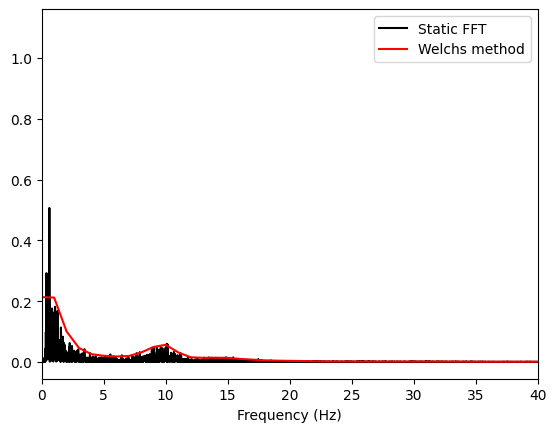

In [108]:
## "manual" Welch's method

# window length in seconds*srate
winlength = int(1 * srate[0])

# number of points of overlap
nOverlap = np.round(srate / 2)

# window onset times
winonsets = np.arange(0, int(N - winlength), int((winlength - nOverlap)[0]))

# note: different-length signal needs a different-length Hz vector
hzW = np.linspace(0, srate / 2, int(floor(winlength / 2) + 1))

# Hann window
hannw = .5 - np.cos(2 * np.pi * np.linspace(0, 1, int(winlength))) / 2

# initialize the power matrix (windows x frequencies)
eegpowW = np.zeros(len(hzW))

# loop over frequencies
for wi in range(0, len(winonsets)):
    # get a chunk of data from this time window
    datachunk = eegdata[winonsets[wi]:winonsets[wi] + winlength]

    # apply Hann taper to data
    datachunk = datachunk * hannw

    # compute its power
    tmppow = np.abs(fft(datachunk) / winlength) ** 2

    # enter into matrix
    eegpowW = eegpowW + tmppow[0:len(hzW)]

# divide by N
eegpowW = eegpowW / len(winonsets)

# plotting
plt.plot(hz, eegpow[0:len(hz)], 'k', label='Static FFT')
plt.plot(hzW, eegpowW / 10, 'r', label='Welch''s method')
plt.xlim([0, 40])
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.show()

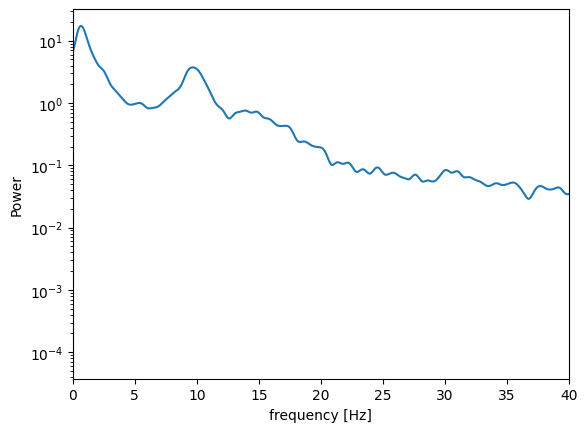

In [109]:
from scipy.signal import welch

## Python's welch

# create Hann window
winsize = int(2 * srate[0])  # 2-second window
hannw = .5 - np.cos(2 * np.pi * np.linspace(0, 1, winsize)) / 2

# number of FFT points (frequency resolution)
nfft = srate * 100

f, welchpow = welch(eegdata, fs=srate, window=hannw, nperseg=winsize, noverlap=winsize / 4, nfft=nfft)

plt.semilogy(f, welchpow)
plt.xlim([0, 40])
plt.xlabel('frequency [Hz]')
plt.ylabel('Power')
plt.show()


---
# VIDEO: Spectrogram of birdsong
---


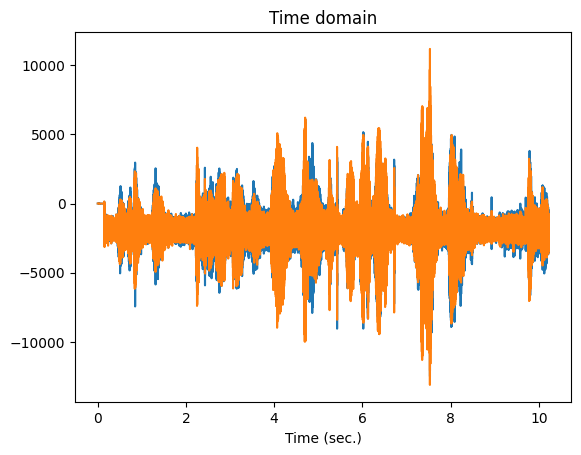

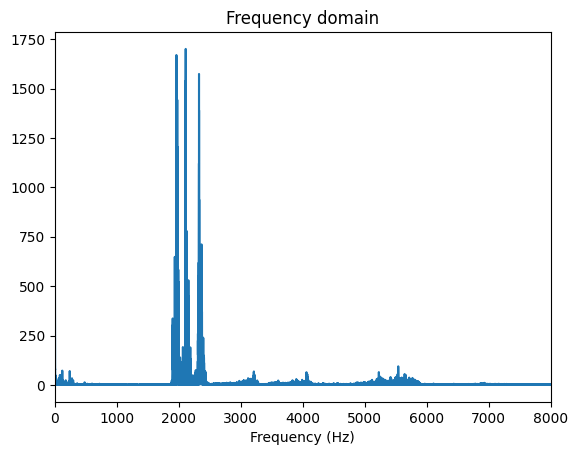

In [110]:
from scipy.signal import detrend

## load in birdcall (source: https://www.xeno-canto.org/403881)
from scipy.io import wavfile

fs, bc = wavfile.read('XC403881.wav')

# create a time vector based on the data sampling rate
n = len(bc)
timevec = np.arange(0, n) / fs

# plot the data from the two channels
plt.plot(timevec, bc)
plt.xlabel('Time (sec.)')
plt.title('Time domain')
plt.show()

# compute the power spectrum
hz = np.linspace(0, fs / 2, int(floor(n / 2) + 1))
bcpow = np.abs(fft(detrend(bc[:, 0])) / n) ** 2

# now plot it
plt.plot(hz, bcpow[0:len(hz)])
plt.xlabel('Frequency (Hz)')
plt.title('Frequency domain')
plt.xlim([0, 8000])
plt.show()

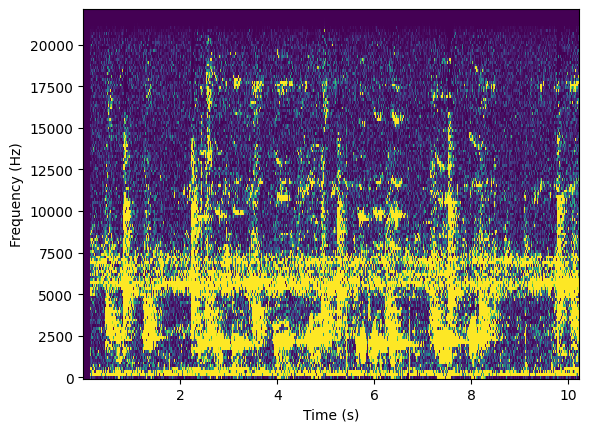

In [111]:
## time-frequency analysis via spectrogram
from scipy.signal import spectrogram

frex, time, pwr = spectrogram(bc[:, 0], fs)

plt.pcolormesh(time, frex, pwr, vmin=0, vmax=9)
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.show()